In [48]:
#Task 1:- SMS Spam Classification

In [49]:
#Importing Necessary Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer
import string
from wordcloud import WordCloud
from collections import Counter

In [50]:
#List of possible encodings to try
encodings = ["utf-8","latini","ISO-8859-1","cp1252"]

file_path = "spam.csv"

#Attempt to read the CSV file with different encodings
for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding = encoding)
        print(f"File saved successfully read with encoding: {encoding}")
        break
    except:
        print(f"Failed to read with encoding: {encoding}")
        continue

#If the loop completes without succes, df will not be defined
if 'df' in locals():
    print("CSV file has been successfully loaded")
else:
    print("All encoding attempts failed. Unable to read the CSV file.")


Failed to read with encoding: utf-8
Failed to read with encoding: latini
File saved successfully read with encoding: ISO-8859-1
CSV file has been successfully loaded


In [51]:
#Taking 5 random values
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5463,ham,U GOIN OUT 2NITE?,NaN,NaN,NaN
860,ham,In work now. Going have in few min.,NaN,NaN,NaN
1804,ham,The bus leaves at &lt;#&gt;,NaN,NaN,NaN
4394,ham,"Only just got this message, not ignoring you. ...",NaN,NaN,NaN
2924,ham,Are you coming to day for class.,NaN,NaN,NaN


In [52]:
#Checking the shape of the dataset
df.shape

(5572, 5)

1. Data Cleaning

In [53]:
#Getting more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [54]:
#Dropping last 3 columns
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"], inplace = True)

In [55]:
#Taking 5 random values
df.sample(5)

,v1,v2
2658,ham,Not yet chikku..wat abt u?
4855,ham,yes baby! I need to stretch open your pussy!
2452,ham,Okay. I've seen it. So i should pick it on fri...
127,ham,Are you there in room.
2283,ham,I reach home safe n sound liao...


In [56]:
#Renaming the columns
df.rename(columns={'v1':'target','v2':'text'}, inplace = True)

In [57]:
#Taking 5 random values
df.sample(5)

,target,text
1393,ham,Oh ok..
1312,ham,I love u 2 babe! R u sure everything is alrite...
750,spam,"Do you realize that in about 40 years, we'll h..."
5233,ham,Hey what how about your project. Started aha da.
1174,ham,Yay! You better not have told that to 5 other ...


In [58]:
#Encoding the target values
encoder = LabelEncoder()
df["target"] = encoder.fit_transform(df["target"])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [59]:
#Checking the missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [60]:
#Checking for duplicate values
df.duplicated().sum()

403

In [61]:
#Removing the duplicate values
df = df.drop_duplicates(keep="first")

In [62]:
#Checking for duplicate values
df.duplicated().sum()

0

In [63]:
#Checking the shape of the dataset
df.shape

(5169, 2)

2. Data Exploration

In [64]:
#Getting first 5 records
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [65]:
#Counting the number of records grouped by target
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

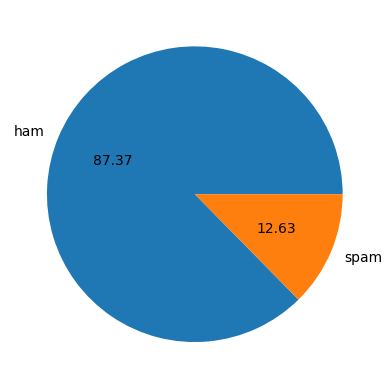

In [66]:
#Visualising with the help of pie chart
plt.pie(df["target"].value_counts(), labels = ["ham","spam"], autopct = "%0.2f")
plt.show()

In [67]:
#BIG CHUNK of ham and very less spam, so the data is not balanced

In [68]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [69]:
#Getting the number of characters of the text in the dataset
df['num_characters'] = df["text"].apply(len)

In [70]:
#Getting first 5 records
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [71]:
#Getting the number of words of the text in the dataset
df['num_words'] = df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [72]:
#Getting first 5 records
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [73]:
#Getting the number of sentences of the text in the dataset
df['num_sentences'] = df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [74]:
#Getting first 5 records
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [75]:
#Getting more information about the new dataset
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [76]:
#Getting more information for the ham messages
df[df['target'] == 0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [77]:
#Getting more information for the spam messages
df[df['target'] == 1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

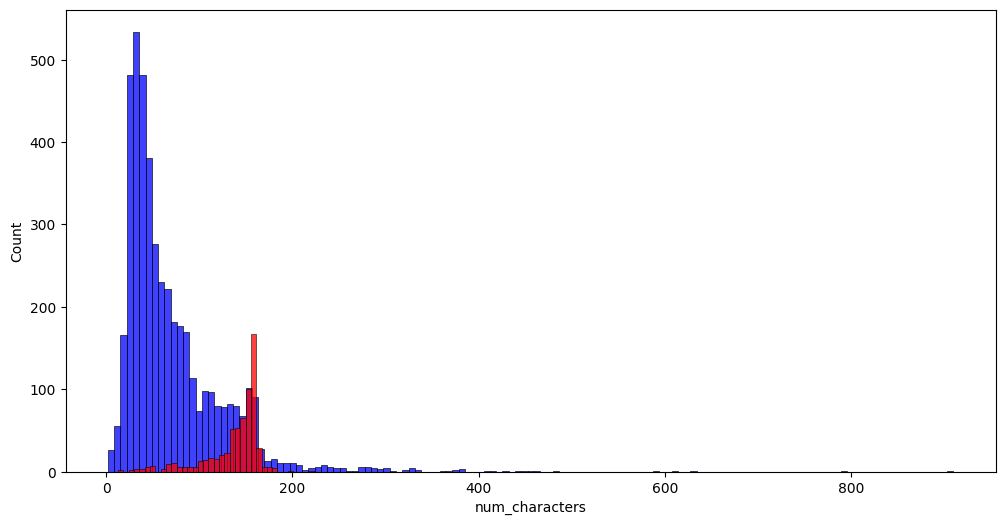

In [78]:
#Plotting histogram comparing num_characters
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"]==0]["num_characters"],color="blue")
sns.histplot(df[df["target"]==1]["num_characters"],color="red")

<Axes: xlabel='num_words', ylabel='Count'>

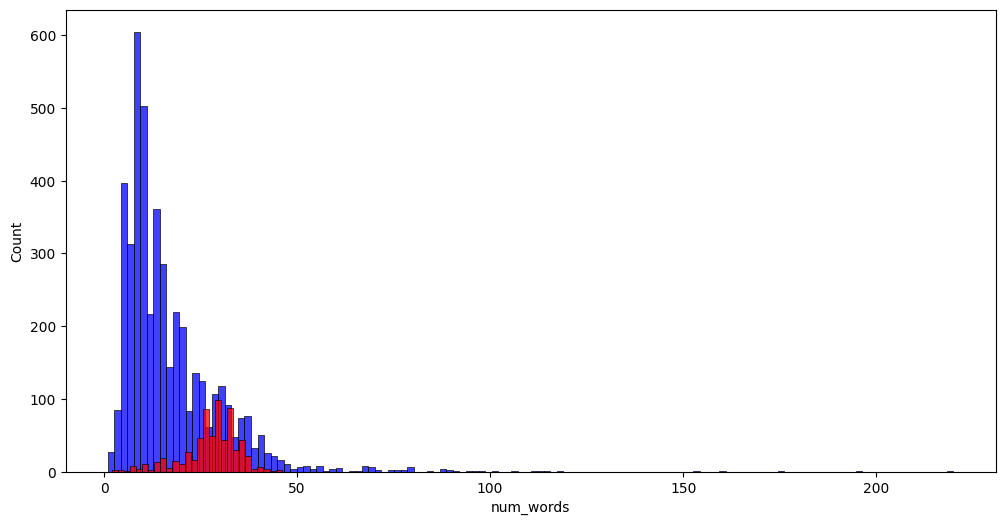

In [79]:
#Plotting histogram comparing num_words
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"]==0]["num_words"],color="blue")
sns.histplot(df[df["target"]==1]["num_words"],color="red")

<Axes: xlabel='num_sentences', ylabel='Count'>

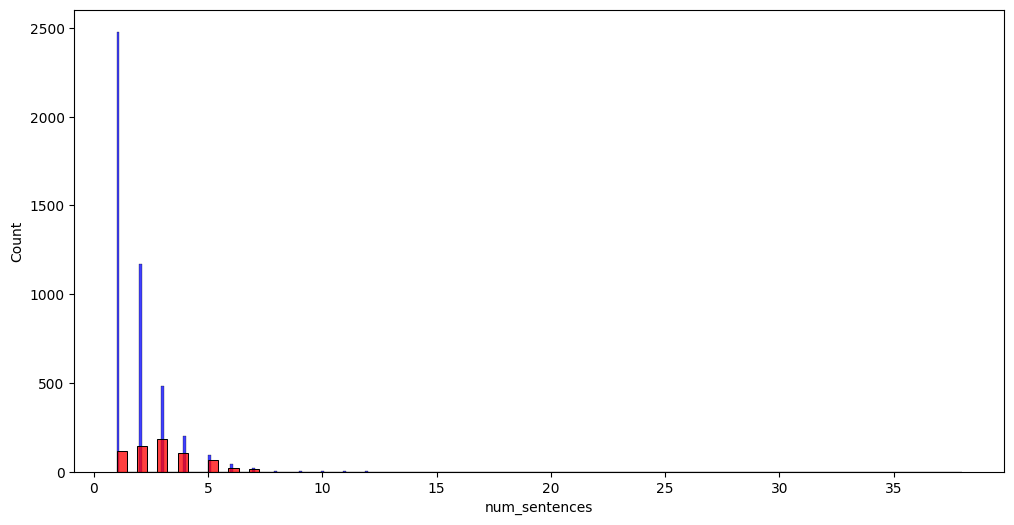

In [80]:
#Plotting histogram comparing num_sentences
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"]==0]["num_sentences"],color="blue")
sns.histplot(df[df["target"]==1]["num_sentences"],color="red")

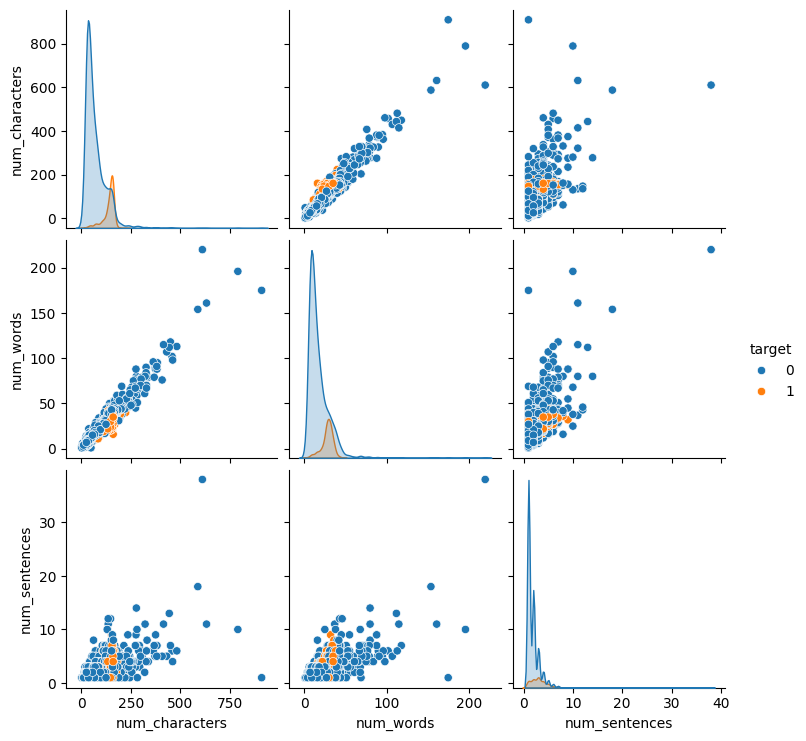

In [81]:
#Visualising with the help of pairplot
sns.pairplot(df,hue="target")

3. Data Preprocessing

In [82]:
#Tranforming text to be used in the dataset
nltk.download("stopwords")
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

df["transformed_text"] = df["text"].apply(transform_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [83]:
#Getting first 5 records
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


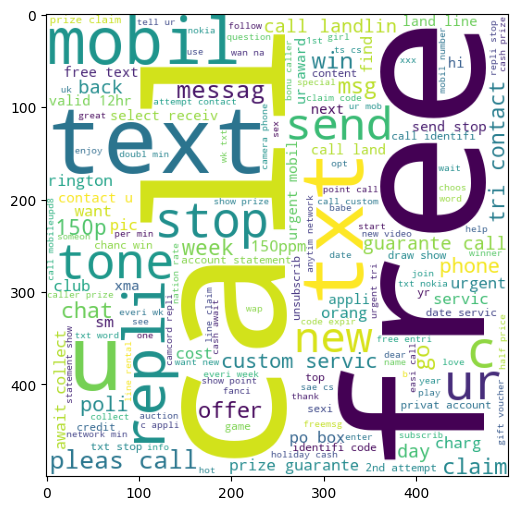

In [84]:
#Visualising the spam words 
wc = WordCloud(width=500, height=500, min_font_size=10, background_color="white")
spam_wc = wc.generate(df[df["target"] == 1]["transformed_text"].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

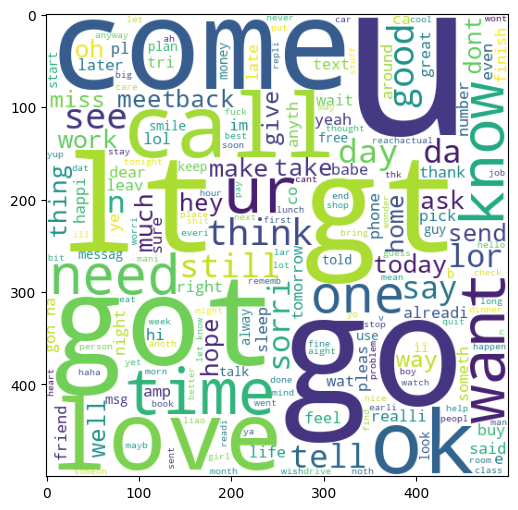

In [85]:
#Visualising the ham words 
wc = WordCloud(width=500, height=500, min_font_size=10, background_color="white")
spam_wc = wc.generate(df[df["target"] == 0]["transformed_text"].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [86]:
#Checking the total number of words in spam messages
spam_corpus = []
for msg in df[df["target"] == 1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)
print(len(spam_corpus))

9939


C:\Users\aksha\AppData\Local\Temp\ipykernel_14804\2087540691.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],palette = "rainbow")


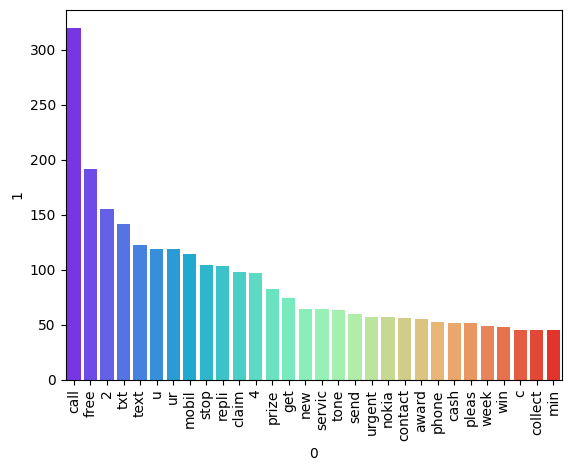

In [87]:
#Plotting the most common spam words
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],palette = "rainbow")
plt.xticks(rotation="vertical")
plt.show()

In [88]:
#Checking the total number of words in ham messages
ham_corpus = []
for msg in df[df["target"] == 0]["transformed_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)
print(len(ham_corpus))

35404


C:\Users\aksha\AppData\Local\Temp\ipykernel_14804\1624489118.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],palette = "rainbow")


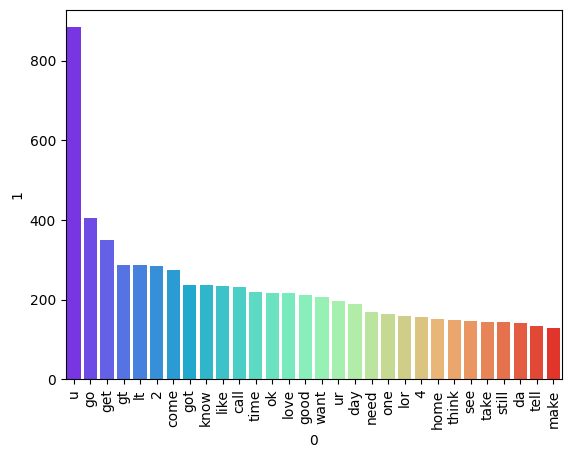

In [89]:
#Plotting the most common spam words
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],palette = "rainbow")
plt.xticks(rotation="vertical")
plt.show()

4. Building the model

In [90]:
#Transforming the text into numbers
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

X = tfidf.fit_transform(df["transformed_text"]).toarray()
print(X.shape)
Y = df["target"].values

(5169, 3000)


In [91]:
#Spliiting the dataset into train set and test set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [92]:
#Model 1:- GaussianNB
model1 = GaussianNB()
model1.fit(X_train,Y_train)
y_pred1 = model1.predict(X_test)
print("Accuracy Score : ",accuracy_score(Y_test,y_pred1))
print("Confusion Matrix : \n",confusion_matrix(Y_test,y_pred1))
print("Precision Score : ",precision_score(Y_test,y_pred1))

Accuracy Score :  0.8694390715667312
Confusion Matrix : 
 [[788 108]
 [ 27 111]]
Precision Score :  0.5068493150684932


In [93]:
#Model 2:- MultinomialNB
model2 = MultinomialNB()
model2.fit(X_train,Y_train)
y_pred2 = model2.predict(X_test)
print("Accuracy Score : ",accuracy_score(Y_test,y_pred2))
print("Confusion Matrix : \n",confusion_matrix(Y_test,y_pred2))
print("Precision Score : ",precision_score(Y_test,y_pred2))

Accuracy Score :  0.9709864603481625
Confusion Matrix : 
 [[896   0]
 [ 30 108]]
Precision Score :  1.0


In [94]:
#Model 3:- BernoulliNB
model3 = BernoulliNB()
model3.fit(X_train,Y_train)
y_pred3 = model3.predict(X_test)
print("Accuracy Score : ",accuracy_score(Y_test,y_pred3))
print("Confusion Matrix : \n",confusion_matrix(Y_test,y_pred3))
print("Precision Score : ",precision_score(Y_test,y_pred3))

Accuracy Score :  0.9835589941972921
Confusion Matrix : 
 [[895   1]
 [ 16 122]]
Precision Score :  0.991869918699187
